# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [2]:
# Import necessary libraries
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Dataset Overview

The dataset can be found at http://www.timeseriesclassification.com/description.php?Dataset=InsectSound . It is made up of 50,000 0.1s samples of audiolike data recorded at 6000Hz. Each sample belogs to 1 of ten classes of insect species/sexes.
Below is an example of a sample from the class Aedes_female.


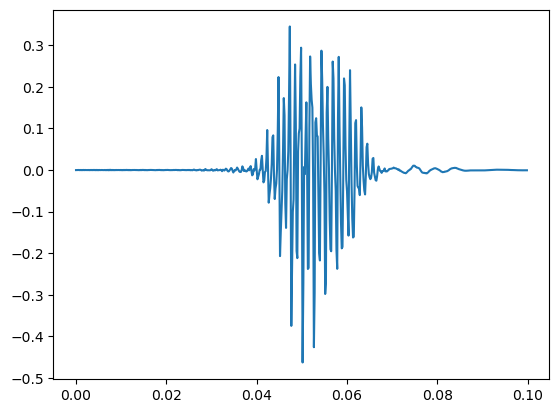

In [3]:
data = loadarff('C:/Users/kelvi/Documents/Studium/Master/6.Semester/Time_Series_Prediction/InsectSound/InsectSound/InsectSound.arff')
df = pd.DataFrame(data[0])
T_timeseries=0.1 #second
f_timeseries=6000 #Hz
Time=np.arange(0,T_timeseries,1/f_timeseries) #time in seconds

#example timeseries
n_example=0
data_example=np.array(df.iloc[n_example, :-1])
type_example=df.iloc[n_example, -1]

plt.plot(Time, data_example)

## Handling Missing Values

As the datset is specificaly made for training and testing classification algorithms there are no missing values.


## Feature Distributions

The most important features of the timeseries are the frequencies and their amplitudes. We get these frequencies by using the Fourier-Transform on the time series data.
The following shows the avereged frequencies for each class once for the full spectrum and once zoomed in. It is obvious that the classes differ in the most prominent frequencies and that some classes are more similar than others.


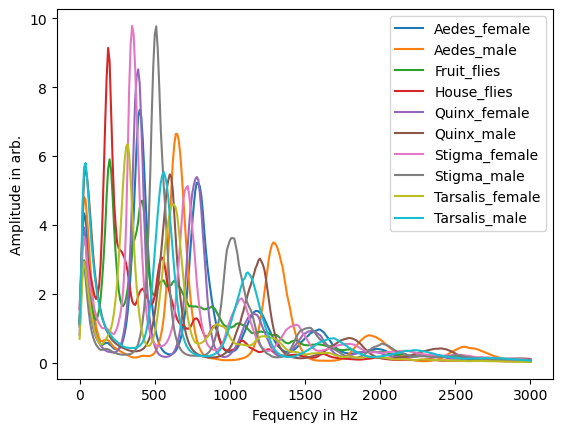

Text(0, 0.5, 'Amplitude in arb.')

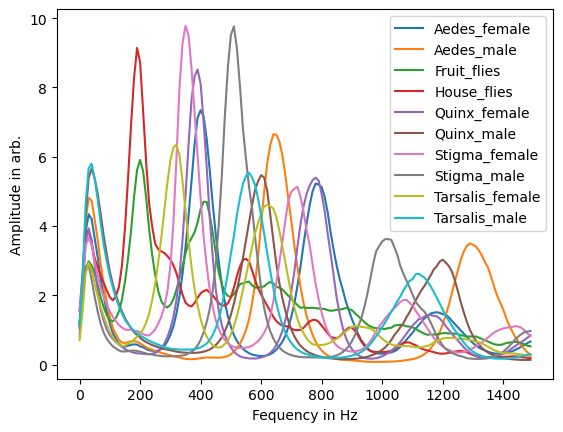

In [5]:
#split the dataframe into 10 dataframes (one for each species)
list_of_dfs = np.array_split(df, 10)
#print(list_of_dataframes[0].shape)

#fourier-transform each timeseries
list_of_fftarrays=[]
for df_i in list_of_dfs:
    values=np.array(df_i.iloc[:, :-1])
    fourier=np.absolute(np.apply_along_axis(np.fft.rfft,1,values))
    list_of_fftarrays.append(fourier)
#plt.plot(list_of_fftarrays[0][0,:])

#average the fourier-transformed time series for every species
list_of_av_ffts=[]
for fft_array in list_of_fftarrays:
    list_of_av_ffts.append(np.sum(fft_array, axis=0)/5000)

    
frequencies=np.fft.rfftfreq(600, d=1/6000)
classes=["Aedes_female", "Aedes_male", "Fruit_flies", "House_flies", "Quinx_female", "Quinx_male", "Stigma_female", "Stigma_male", "Tarsalis_female", "Tarsalis_male"]

for i in range(len(list_of_av_ffts)):
    plt.plot(frequencies,list_of_av_ffts[i], label=classes[i])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlabel('Fequency in Hz')
plt.ylabel('Amplitude in arb.')
plt.show()

for i in range(len(list_of_av_ffts)):
    plt.plot(frequencies[:150],list_of_av_ffts[i][:150], label=classes[i])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper right')
plt.xlabel('Fequency in Hz')
plt.ylabel('Amplitude in arb.')



## Possible Biases

The dataset doesn't have a bias when it comes to the number of samples per class, for each class there are 5000 samples. We didn't find any other biases and have no reason to suspect that any biases with influence on the classification problem exist within the dataset.


## Correlations

As seen in Feature Distributions there is a correlation between the most prominent frequencies in a sample and the class of the sample. To identify the details of this correlation using algorithms is the goal of this project and repository.
